In [484]:
# Gerekli kütüphaneleri import ediyoruz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [485]:
#veri setimizi çekiyor ve kopyalıyoruz
#asıl veriyi bozmuyoruz
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
#ilk 5 satırı inceliyoruz
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [486]:
#null değer var mı
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [487]:
#veri tipi hakkında bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Veri Analizi ve Görselleştirme

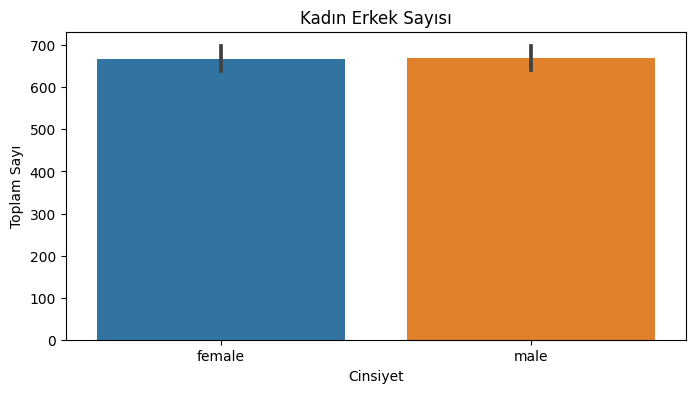

In [488]:
#cinsiyet analizi
plt.figure(figsize=(8,4))
sns.barplot(x="sex", y=df.index, data=df)
plt.title("Kadın Erkek Sayısı")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Sayı")
plt.show()

In [489]:
#erkek ve kadın sayısı hemen hemen aynı

In [490]:
#bmi analizi
df["bmi"].describe().T

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

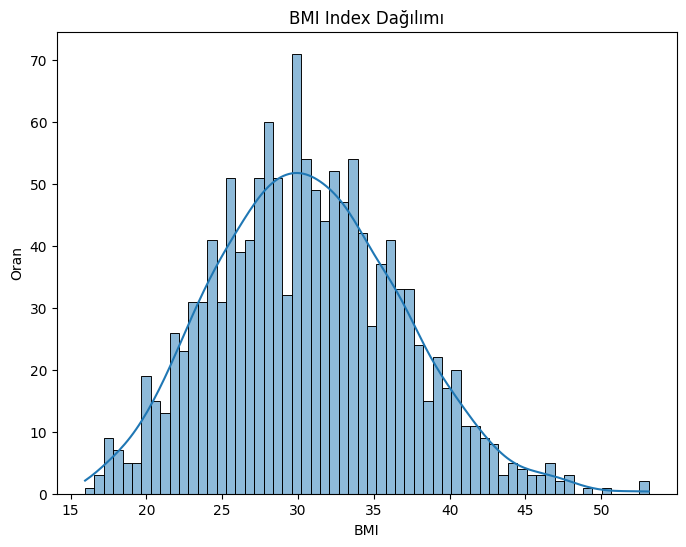

In [491]:
#bmi dağılımı görselleştirme
plt.figure(figsize=(8, 6))
sns.histplot(df["bmi"],bins = 60,kde = True)
plt.title("BMI Index Dağılımı")
plt.xlabel("BMI")
plt.ylabel("Oran")
plt.show()

In [492]:
#bmi endeksi 25 - 35 arası değişiyor

Text(0.5, 1.0, 'Bölgelere göre sigara içme Oranı')

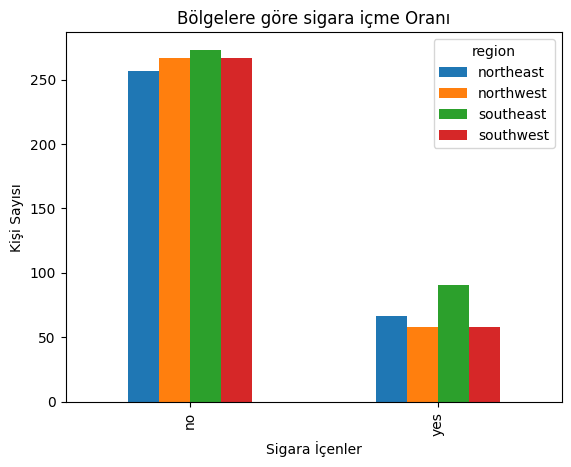

In [493]:
#Bölgelere göe sigara içme oranı
smoker_region=df.groupby("smoker")["region"].value_counts().unstack()
smoker_region.plot(kind="bar")
plt.xlabel("Sigara İçenler")
plt.ylabel("Kişi Sayısı")
plt.title("Bölgelere göre sigara içme Oranı")

In [494]:
#southeast bölgesi sigara içme oranında birinci

Text(0.5, 1.0, 'BMI - Cinsiyet Oranı')

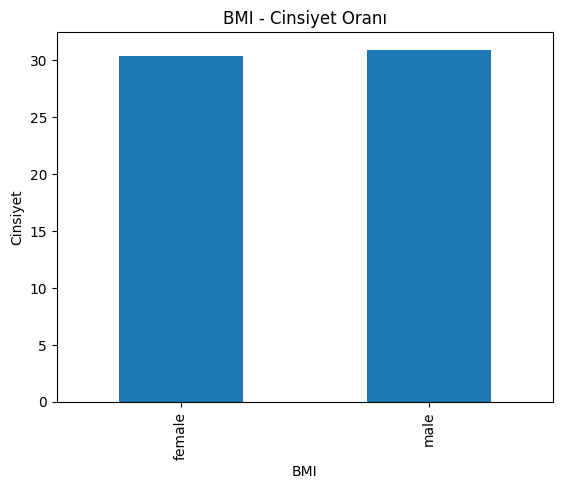

In [495]:
#cinsiyet bmi oranı
sex_bmi=df.groupby("sex")["bmi"].mean()
sex_bmi.plot(kind="bar")
plt.xlabel("BMI")
plt.ylabel("Cinsiyet")
plt.title("BMI - Cinsiyet Oranı")


In [496]:
#bmi oranı kadın ve erkeklerde hemen hemen aynı ve 30 değerine yakın. Erkeklerde 30u biraz geçmiş

(array([0, 1, 2, 3]),
 [Text(0, 0, 'northeast'),
  Text(1, 0, 'northwest'),
  Text(2, 0, 'southeast'),
  Text(3, 0, 'southwest')])

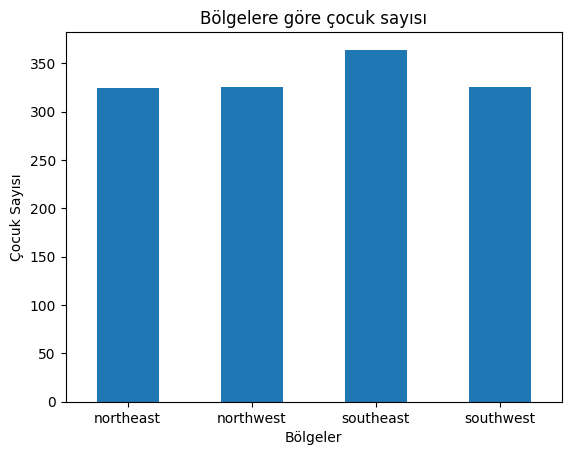

In [497]:
#en çok çocuk sahibi bölge
region_chd=df.groupby("region")["children"].count()
region_chd.plot(kind="bar")
plt.xticks(rotation=45)
plt.xlabel("Bölgeler")
plt.ylabel("Çocuk Sayısı")
plt.title("Bölgelere göre çocuk sayısı")
plt.xticks(rotation=0)

In [498]:
#En çok çocuk sayısı southeast bölgesinde

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

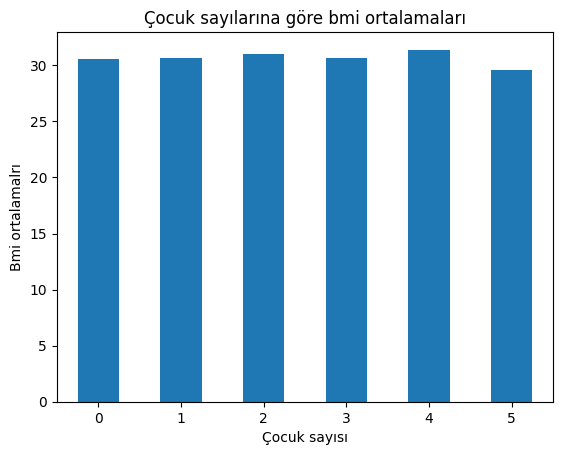

In [499]:
#çocuk sahibi olma ve bmi oranı
ch_bmi=df.groupby("children")["bmi"].mean()
ch_bmi.plot(kind="bar")
plt.xlabel("Çocuk sayısı")
plt.ylabel("Bmi ortalamalrı")
plt.title("Çocuk sayılarına göre bmi ortalamaları")
plt.xticks(rotation=0)

In [500]:
#5 çocuk sahibi olanların bmi oranı 30un altında

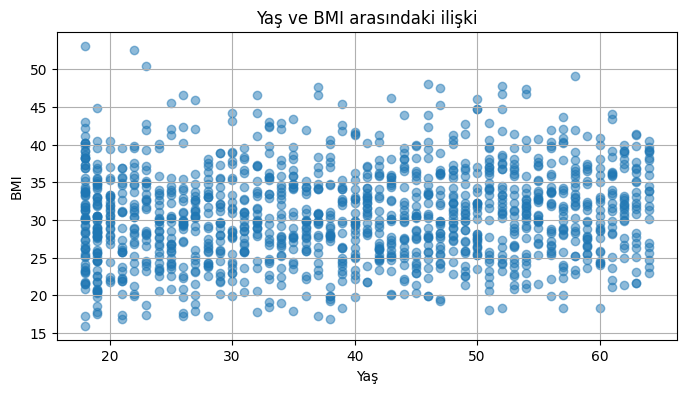

In [501]:
#yaş ve bmi arasındaki ilişki
plt.figure(figsize=(8, 4))
plt.scatter(df["age"], df["bmi"], alpha=0.5)
plt.title("Yaş ve BMI arasındaki ilişki")
plt.xlabel("Yaş")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

In [502]:
# bmi oranı 25-35 yaş arası yoğunlaşmış fakat 30 yaş altında aykırı değer oranı fazla

Text(0.5, 1.0, 'Ücret ve BMI endeksi arasındaki ilişki')

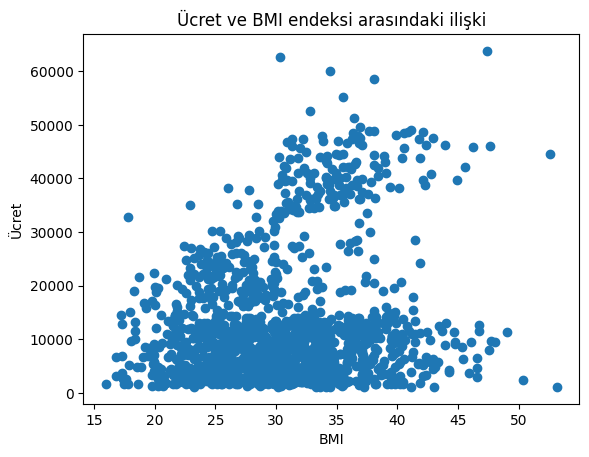

In [503]:
#bmi ve charges arasındaki ilişki
plt.scatter(df["bmi"],df["charges"])
plt.xlabel("BMI")
plt.ylabel("Ücret")
plt.title("Ücret ve BMI endeksi arasındaki ilişki")


In [504]:
#ücretler en aykırı sonucu 30-35 bmi endeksi arasında vermiş

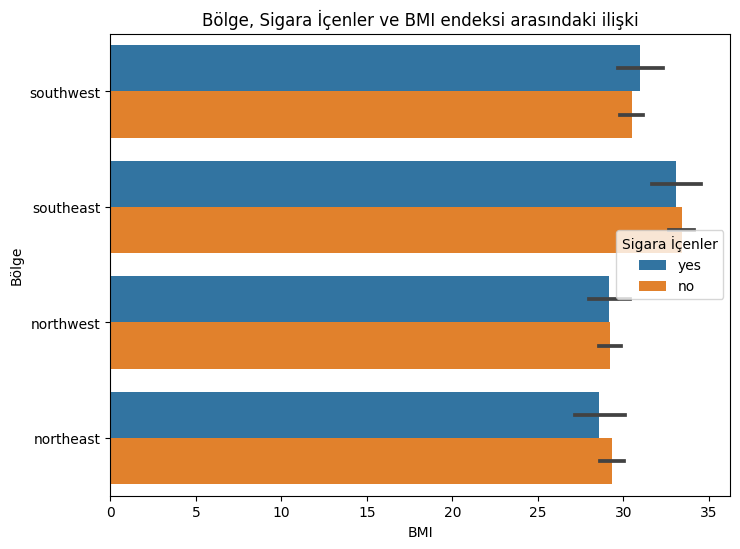

In [505]:
#bölgelere göre sigara içen kişi sayısı ve bmi arasındaki ilişki
plt.figure(figsize=(8,6))
sns.barplot(x="bmi", y="region", hue="smoker", data=df)
plt.title("Bölge, Sigara İçenler ve BMI endeksi arasındaki ilişki")
plt.xlabel("BMI")
plt.ylabel("Bölge")
plt.legend(title="Sigara İçenler")
plt.show()

In [506]:
#en çok sigara southeast bölgesinde içilmiş ve bmi endeksi 30un üstünde

Aykırı Değer Analizi

In [507]:
#bmi verilerinde aykırı değer var mı
from scipy import stats
z_scores = stats.zscore(df["bmi"])
threshold = 3
outliers = abs(z_scores) > threshold
outlier_values = df["bmi"][outliers]

print("Aykırı değerler:", outlier_values)

Aykırı değerler: 116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


In [508]:
#bu değeri temizle
clean_df = df[~outliers]
encode_df = pd.get_dummies(clean_df, columns=["region", "smoker", "sex"], prefix=["region", "smoker", "sex"])

In [509]:
from sklearn.model_selection import train_test_split

X = encode_df.drop("charges", axis=1)
y = encode_df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Seçme

In [510]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(encode_df.drop("charges", axis=1))
scaled_df = pd.DataFrame(X_scaled, columns=encode_df.drop("charges", axis=1).columns)

In [511]:
def crossval(model):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    forest_reg_rmse_scores = np.sqrt(-scores)
    print("cv : ")
    return forest_reg_rmse_scores.mean()

In [512]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_model = linear_regressor.fit(X_train,y_train)
linear_pred = linear_regressor.predict(X_test)
crossval(linear_model)

cv : 


6100.748864465365

In [513]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regression_model = DecisionTreeRegressor(max_depth=3, random_state=42)
decision_tree_regression_model = decision_tree_regressor.fit(X_train, y_train)
decision_tree_regression_pred = decision_tree_regression_model.predict(X_test)
crossval(decision_tree_regression_model)

cv : 


6595.307924115416

In [514]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regression_model = RandomForestRegressor()
random_forest_regressor = RandomForestRegressor(random_state=42)
Forest_model = random_forest_regressor.fit(X_train,y_train)
RandomForest_pred = Forest_model.predict(X_test)
crossval(Forest_model)

cv : 


4827.4917304380415

Hiper Parametre Optimizasyonu

In [515]:
param_grid = [
    { "n_estimators": [10, 20, 30, 40, 50], "max_depth": [3, 5, 7, 9, 11] },
    { "bootstrap": [False], "n_estimators": [3, 10], "max_depth": [3, 5, 7, 9, 11]}
]

In [516]:
#en iyi model
from sklearn.model_selection import GridSearchCV
random_forest_regressor = RandomForestRegressor(random_state=42)
forest_grid_search = GridSearchCV(random_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
forest_grid_search.fit(X_scaled, y)
forest_grid_search.best_params_

{'max_depth': 5, 'n_estimators': 50}

Model Değerlendirme

In [517]:
all_of_the_best_model = forest_grid_search.best_estimator_

y_pred = all_of_the_best_model.predict(X_scaled)

In [518]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

final_scores = [mse,mae,r2]
final_scores_labels = ["mse","mae","r2"]

for i,j in zip(final_scores,final_scores_labels):
    print(f"{j} : {i}")

mse : 16536448.36138292
mae : 2273.1634205258656
r2 : 0.8867757965112212
